In [42]:
import pandas as pd
data=pd.read_csv("titan2.csv",sep=";")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


# DATA INFORMATIONS:

In [16]:
info=data.info()
describe=data.describe()
info
describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DATA CLEANING:

In [27]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [34]:
print(data.isnull().sum())
print("There are :",data.isnull().sum().sum(),"missing pieces of data")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
There are : 866 missing pieces of data


In [47]:
data["Age"].fillna(data["Age"].mean,inplace=True)
data["Cabin"].fillna("G6",inplace=True)
data["Embarked"].fillna("S",inplace=True)

In [49]:
data.isnull().sum()
print("There are :",data.isnull().sum().sum(),"missing pieces of data")

There are : 0 missing pieces of data


# DATA VISUALIZATION:

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


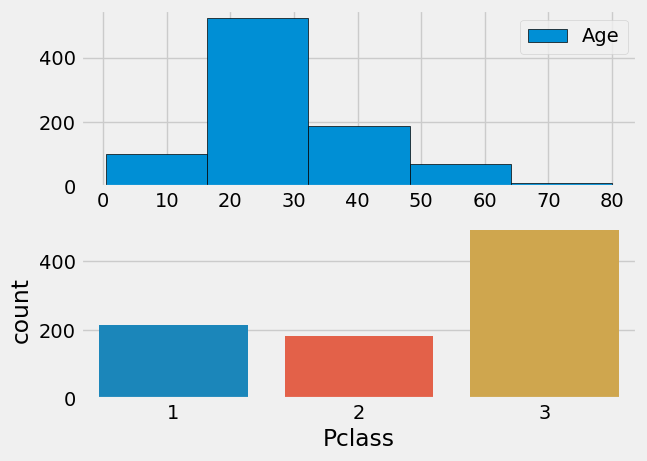

In [190]:
import matplotlib.pyplot as plt
import seaborn as sn
fig,(ax1,ax2)=mt.subplots(2,1)
plt.style.use("fivethirtyeight")
ax1.hist(data["Age"],label='Age',edgecolor="black",bins=5)
sn.countplot(data["Pclass"])
ax1.legend()



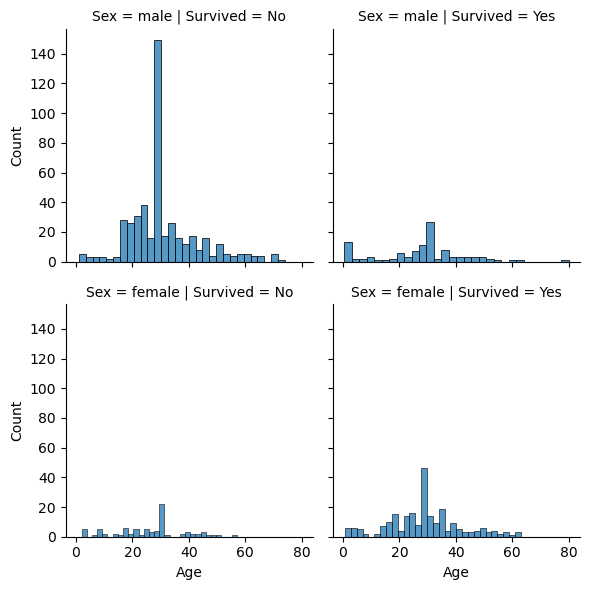

In [204]:
plt.style.use("default")
g=sn.FacetGrid(data,col="Survived",row="Sex")
g.map(sn.histplot,"Age",bins=30)


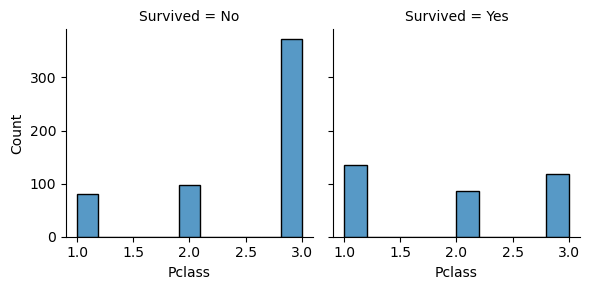

In [209]:
g=sn.FacetGrid(data,col="Survived")
g.map(sn.histplot,"Pclass")

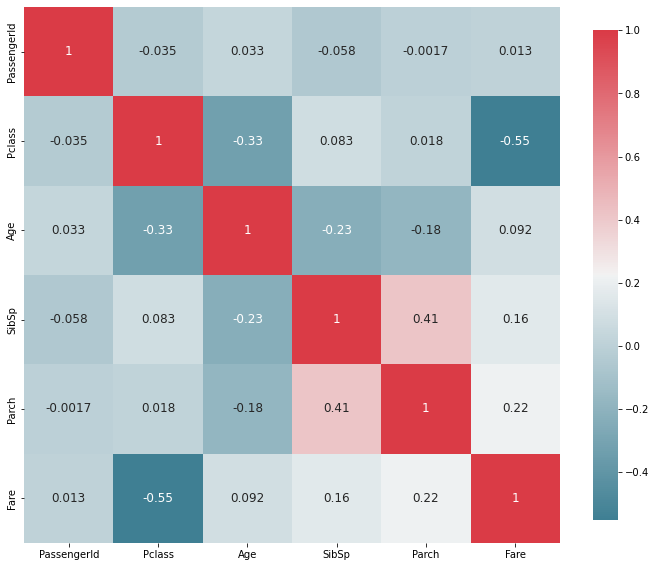

In [8]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data)

# DESCREPTION:

In [ ]:
this heatmap replaces each of the variables on the two axes with a list of numeric variables in the dataset.
Each cell depicts the relationship between the intersecting variables, such as a linear correlation if If the value between 
the two variables in the two axes is less than one, then the relationship between them is inverse and if it was positive than the 
relationship is positive.


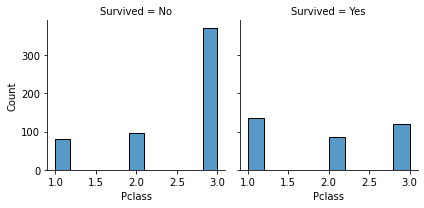

In [10]:
import seaborn as sn
g=sn.FacetGrid(data,col="Survived")
g.map(sn.histplot,"Pclass")

# DROP USELESS DATA:

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("titan.csv",sep=";")
data["Age"].fillna(data["Age"].mean(),inplace=True)
data["Cabin"].fillna('G6',inplace=True)
drop=data.drop(["Name","Embarked","SibSp","Parch","Fare","Ticket"],axis=1)
drop

,PassengerId,Survived,Pclass,Sex,Age,Cabin
0,343,No,2,male,28.000000,G6
1,76,No,3,male,25.000000,F G73
2,641,No,3,male,20.000000,G6
3,568,No,3,female,29.000000,G6
4,672,No,1,male,31.000000,B71
...,...,...,...,...,...,...
886,10,Yes,2,female,14.000000,G6
887,61,No,3,male,22.000000,G6
888,535,No,3,female,30.000000,G6
889,102,No,3,male,29.699118,G6


In [35]:
data["title"]=data["Name"]
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S,"Collander, Mr. Erik Gustaf"
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S,"Moen, Mr. Sigurd Hansen"
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S,"Jensen, Mr. Hans Peder"
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S,"Palsson, Mrs. Nils (Alma Cornelia Berglund)"
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S,"Davidson, Mr. Thornton"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C,"Nasser, Mrs. Nicholas (Adele Achem)"
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C,"Sirayanian, Mr. Orsen"
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S,"Cacic, Miss. Marija"
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S,"Petroff, Mr. Pastcho (""Pentcho"")"
